# Predicting Expected Goal Contributions in Soccer with Machine Learning
#### Vikas Thoti Reddy

## Introduction
...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math

import warnings
warnings.filterwarnings("ignore")

## Data Processing and Cleaning
...

In [2]:
# loading data
appearances = pd.read_csv("data/appearances.csv")
games = pd.read_csv("data/games.csv")
players = pd.read_csv("data/players.csv")
clubs = pd.read_csv("data/clubs.csv")
competitions = pd.read_csv("data/competitions.csv")

# selecting data from the top 5 major domestic leagues and cups in Europe, Champions League, and Europa League
"""
competitions = ["CL", "EL", "GB1", "IT1", "L1", "FR1", "ES1", "DFB", "CDR", "CIT", "CGB", "FRCH"]
appearances = appearances.loc[appearances["competition_id"].isin(competitions)]
games = games.loc[games["competition_id"].isin(competitions)]
"""

print("done")

done


In [3]:
# cleaning player data
players = players[["player_id", "pretty_name", "country_of_citizenship", "foot", "height_in_cm", "date_of_birth", 
                   "position","market_value_in_gbp", "highest_market_value_in_gbp", "club_id"]]
players['date_of_birth'] = players['date_of_birth'].astype(str)
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'])
players["age_days"] = (datetime.datetime.now() - players['date_of_birth']).astype('timedelta64[D]')
players["age_years"] = (datetime.datetime.now() - players['date_of_birth']).astype('timedelta64[Y]')
players

,player_id,pretty_name,country_of_citizenship,foot,height_in_cm,date_of_birth,position,market_value_in_gbp,highest_market_value_in_gbp,club_id,age_days,age_years
0,254016,Arthur Delalande,France,Right,186,1992-05-18,Midfield,NaN,90000.0,855,11168.0,30.0
1,51053,Daniel Davari,Iran,Right,192,1988-01-06,Goalkeeper,135000.0,1130000.0,23,12762.0,34.0
2,31451,Torsten Oehrl,Germany,Right,192,1986-01-07,Attack,NaN,1130000.0,23,13491.0,36.0
3,44622,Vladimir Kisenkov,Russia,Right,182,1981-10-08,Defender,NaN,720000.0,3691,15043.0,41.0
4,30802,Oscar Diaz,Spain,Right,183,1984-04-24,Attack,NaN,1080000.0,3302,14114.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25619,256718,Sven Van Beek,Netherlands,Right,189,1994-07-28,Defender,1000000.0,5500000.0,306,10367.0,28.0
25620,646704,Maxim Dekker,Netherlands,Left,0,2004-04-21,Defender,1500000.0,1500000.0,1090,6812.0,18.0
25621,454628,Alex Timossi Andersson,Sweden,Right,170,2001-01-19,Attack,1200000.0,1500000.0,306,8000.0,21.0
25622,462988,Danil Lipovoy,Russia,Left,177,1999-09-22,Midfield,300000.0,350000.0,2696,8485.0,23.0


In [4]:
# attatching current club team and domestic competition id to each player
clubs = clubs[["club_id", "pretty_name","domestic_competition_id"]]
clubs.columns = ["club_id", "club_name", "domestic_competition_id"]
players = players.merge(clubs, left_on='club_id', right_on='club_id')

competitions = competitions[["competition_id", "pretty_name"]]
competitions.columns = ["competition_id", "competition_name"]
players = players.merge(competitions, left_on='domestic_competition_id', right_on='competition_id')
players

,player_id,pretty_name,country_of_citizenship,foot,height_in_cm,date_of_birth,position,market_value_in_gbp,highest_market_value_in_gbp,club_id,age_days,age_years,club_name,domestic_competition_id,competition_id,competition_name
0,254016,Arthur Delalande,France,Right,186,1992-05-18,Midfield,NaN,90000.0,855,11168.0,30.0,Ea Guingamp,FR1,FR1,Ligue 1
1,225616,Paul Babiloni,France,Right,180,1990-01-16,Defender,NaN,360000.0,855,12021.0,32.0,Ea Guingamp,FR1,FR1,Ligue 1
2,45264,Thierry Argelier,France,Right,183,1986-07-08,Defender,NaN,540000.0,855,13309.0,36.0,Ea Guingamp,FR1,FR1,Ligue 1
3,6274,Gregory Cerdan,France,Right,190,1982-07-28,Defender,NaN,2250000.0,855,14750.0,40.0,Ea Guingamp,FR1,FR1,Ligue 1
4,1613,Vivian,Brazil,NaN,0,1982-04-05,Defender,NaN,1350000.0,855,14864.0,40.0,Ea Guingamp,FR1,FR1,Ligue 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25619,168166,Lucas Pirard,Belgium,Right,191,1995-03-10,Goalkeeper,400000.0,1500000.0,3948,10142.0,27.0,Royale Union Saint Gilloise,BE1,BE1,Jupiler Pro League
25620,78570,Anthony Moris,Luxembourg,Left,186,1990-04-29,Goalkeeper,1500000.0,1500000.0,3948,11918.0,32.0,Royale Union Saint Gilloise,BE1,BE1,Jupiler Pro League
25621,450958,Ross Sykes,England,Right,196,1999-03-26,Defender,700000.0,700000.0,3948,8665.0,23.0,Royale Union Saint Gilloise,BE1,BE1,Jupiler Pro League
25622,338668,Senne Lynen,Belgium,Right,185,1999-02-19,Midfield,2000000.0,2000000.0,3948,8700.0,23.0,Royale Union Saint Gilloise,BE1,BE1,Jupiler Pro League


In [5]:
# merging appearance data with player data
full_player_stats = appearances.merge(players, left_on='player_id', right_on='player_id')
full_player_stats.dropna()
full_player_stats['date'] = full_player_stats['date'].astype(str)
full_player_stats['date'] = pd.to_datetime(full_player_stats['date'])
full_player_stats = full_player_stats.sort_values("date")

# selecting data from 2019-2020, 2020-2021 seasons
start_datetime = datetime.datetime(2019, 7, 30)
end_datetime = datetime.datetime(2021, 6, 1)
player_stats = full_player_stats.loc[full_player_stats["date"] > start_datetime]
player_stats = player_stats.loc[player_stats["date"] < end_datetime]

# creating out of sample data for testing
start_datetime = datetime.datetime(2021, 7, 30)
end_datetime = datetime.datetime(2022, 6, 1)
out_sample = full_player_stats.loc[full_player_stats["date"] > start_datetime]
out_sample = out_sample.loc[out_sample["date"] < end_datetime]

In [6]:
# summing stats for players across their appearences in selected competitions
sum_stats = ["goals", "assists", "minutes_played", "yellow_cards", "red_cards"]
player_stats_sum = player_stats.groupby("player_id")[sum_stats].sum()
player_stats_sum = player_stats_sum.sort_values("goals", ascending=False)

# capturing player info data that does not need aggregating
details = ["pretty_name", "country_of_citizenship", "foot", "height_in_cm", "club_id", "club_name", 
           "domestic_competition_id","position", "market_value_in_gbp", "highest_market_value_in_gbp",
           "age_days", "age_years", "competition_name"]
def detail(x):
    return x[0]
player_details = player_stats.groupby("player_id")[details]
player_details = player_details.agg(lambda col: np.sort(col.unique()).tolist())
for col in player_details.columns:
    player_details[col] = player_details[col].apply(detail)

# merging data into one dataframe
player_info = player_details.merge(player_stats_sum, left_index=True, right_index=True)
player_info = player_info.dropna()
player_info = player_info.sort_values("goals", ascending=False)
player_info = player_info.loc[player_info["minutes_played"] > 3000]
player_info.describe()

,height_in_cm,club_id,market_value_in_gbp,highest_market_value_in_gbp,age_days,age_years,goals,assists,minutes_played,yellow_cards,red_cards
count,2284.000000,2284.000000,2.284000e+03,2.284000e+03,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000,2284.000000
mean,182.467163,2507.939142,9.081071e+06,1.658913e+07,10816.618214,29.070928,6.710595,5.303415,4547.323117,9.035902,0.211471
std,8.490765,6694.142147,1.524738e+07,2.204052e+07,1447.282993,3.974211,9.100541,5.637103,1183.187001,5.326528,0.464631
min,0.000000,3.000000,4.500000e+04,2.700000e+05,7166.000000,19.000000,0.000000,0.000000,3001.000000,0.000000,0.000000
25%,178.000000,244.000000,8.100000e+05,2.700000e+06,9694.750000,26.000000,1.000000,1.000000,3560.000000,5.000000,0.000000
50%,183.000000,653.000000,3.000000e+06,8.000000e+06,10739.500000,29.000000,3.000000,4.000000,4315.500000,8.000000,0.000000
75%,187.000000,1428.250000,1.000000e+07,2.200000e+07,11848.500000,32.000000,9.000000,8.000000,5289.000000,12.000000,0.000000
max,200.000000,60949.000000,1.700000e+08,2.000000e+08,15265.000000,41.000000,103.000000,50.000000,8816.000000,32.000000,3.000000


In [7]:
# doing the same for an out of sample data set for testing much later on

# summing stats for players across their appearences in selected competitions
out_sample_sum = out_sample.groupby("player_id")[sum_stats].sum()
out_sample_sum = out_sample_sum.sort_values("goals", ascending=False)

# capturing player info data that does not need aggregating
details = ["pretty_name", "country_of_citizenship", "foot", "height_in_cm", "club_id", "club_name", 
           "domestic_competition_id","position", "market_value_in_gbp", "highest_market_value_in_gbp",
           "age_days", "age_years", "competition_name"]
def detail(x):
    return x[0]
out_sample_details = out_sample.groupby("player_id")[details]
out_sample_details = out_sample_details.agg(lambda col: np.sort(col.unique()).tolist())
for col in out_sample_details.columns:
    out_sample_details[col] = out_sample_details[col].apply(detail)

# merging data into one dataframe
out_sample_player_info = out_sample_details.merge(out_sample_sum, left_index=True, right_index=True)
out_sample_player_info = out_sample_player_info.dropna()
out_sample_player_info = out_sample_player_info.sort_values("goals", ascending=False)
out_sample_player_info.describe()

,height_in_cm,club_id,market_value_in_gbp,highest_market_value_in_gbp,age_days,age_years,goals,assists,minutes_played,yellow_cards,red_cards
count,5852.000000,5852.000000,5.852000e+03,5.852000e+03,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000
mean,181.306049,3754.964457,5.447555e+06,9.605538e+06,9927.831852,26.633117,2.047334,1.603725,1459.748462,3.118934,0.082194
std,15.773905,9637.407745,1.126785e+07,1.668548e+07,1651.757071,4.536551,3.620945,2.450677,1007.808827,2.918983,0.286858
min,0.000000,3.000000,2.300000e+04,2.300000e+04,6184.000000,16.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,178.000000,336.000000,4.500000e+05,9.000000e+05,8665.750000,23.000000,0.000000,0.000000,596.000000,1.000000,0.000000
50%,183.000000,873.000000,1.500000e+06,3.000000e+06,9788.000000,26.000000,1.000000,1.000000,1372.000000,2.000000,0.000000
75%,187.000000,2687.000000,5.000000e+06,1.000000e+07,11134.250000,30.000000,2.000000,2.000000,2215.250000,5.000000,0.000000
max,206.000000,83678.000000,1.700000e+08,2.000000e+08,15288.000000,41.000000,50.000000,25.000000,4980.000000,18.000000,2.000000


In [8]:
# calculate statistics and sort data
player_info["goal_contributions"] = player_info["goals"] + player_info["assists"]
player_info["avg_goal_contributions_per_season"] = player_info["goal_contributions"] / 3
player_info = player_info.sort_values("goal_contributions", ascending=False)
all_positions = player_info.loc[player_info["minutes_played"] > 0]

# calculate statistics and sort out of sample data
out_sample_player_info["goal_contributions"] = out_sample_player_info["goals"] + player_info["assists"]
out_sample_player_info = out_sample_player_info.sort_values("goal_contributions", ascending=False)

In [9]:
# change league to number for usage in ML models later
leagues = all_positions.competition_name.unique()
leagues_dict = dict(zip(leagues, range(len(leagues))))
all_positions["league_name_id"] = all_positions["competition_name"].map(
    lambda league: leagues_dict.get(league) if league in leagues_dict else league
)

# out of sample data
leagues = out_sample_player_info.competition_name.unique()
leagues_dict = dict(zip(leagues, range(len(leagues))))
out_sample_player_info["league_name_id"] = out_sample_player_info["competition_name"].map(
    lambda league: leagues_dict.get(league) if league in leagues_dict else league
)

print(leagues_dict)

{'Laliga': 0, 'Bundesliga': 1, 'Eredivisie': 2, 'Ligue 1': 3, 'Premier League': 4, 'Serie A': 5, 'Liga Portugal Bwin': 6, 'Scottish Premiership': 7, 'Premier Liga': 8, 'Jupiler Pro League': 9, 'Super Lig': 10, 'Super League 1': 11, 'Superligaen': 12}


In [10]:
# change country_of_citizenship to number for usage in ML models later
nations = all_positions.country_of_citizenship.unique()
nations_dict = dict(zip(nations, range(len(nations))))
all_positions["nation_id"] = all_positions["country_of_citizenship"].map(
    lambda nation: nations_dict.get(nation) if nation in nations_dict else nation
)

# out of sample data
nations = out_sample_player_info.country_of_citizenship.unique()
nations_dict = dict(zip(nations, range(len(nations))))
out_sample_player_info["nation_id"] = out_sample_player_info["country_of_citizenship"].map(
    lambda nation: nations_dict.get(nation) if nation in nations_dict else nation
)

print(nations_dict)

{'Poland': 0, 'France': 1, 'Germany': 2, 'Serbia': 3, 'Belgium': 4, 'Argentina': 5, 'Egypt': 6, 'Italy': 7, 'Portugal': 8, 'Korea, South': 9, 'Norway': 10, 'Iran': 11, 'Algeria': 12, 'England': 13, "Cote d'Ivoire": 14, 'Senegal': 15, 'Colombia': 16, 'Netherlands': 17, 'Spain': 18, 'Bosnia-Herzegovina': 19, 'Russia': 20, 'Brazil': 21, 'Japan': 22, 'Nigeria': 23, 'Mexico': 24, 'Canada': 25, 'Israel': 26, 'Turkey': 27, 'Czech Republic': 28, 'Cameroon': 29, 'Ukraine': 30, 'Morocco': 31, 'Greece': 32, 'Uruguay': 33, 'Denmark': 34, 'Gabon': 35, 'Jamaica': 36, 'Scotland': 37, 'Croatia': 38, 'Switzerland': 39, 'Armenia': 40, 'Slovenia': 41, 'Austria': 42, 'United States': 43, 'Togo': 44, 'Sweden': 45, 'Ghana': 46, 'The Gambia': 47, 'Romania': 48, 'Ecuador': 49, 'Venezuela': 50, 'Georgia': 51, 'Guinea': 52, 'DR Congo': 53, 'Mali': 54, 'Zambia': 55, 'Angola': 56, 'Uzbekistan': 57, 'Australia': 58, 'Kosovo': 59, 'Wales': 60, 'Slovakia': 61, 'Ireland': 62, 'Northern Ireland': 63, 'Chile': 64, 'Tun

In [11]:
# change country_of_citizenship to number for usage in ML models later
positions = all_positions.position.unique()
positions_dict = dict(zip(positions, range(len(positions))))
all_positions["position_id"] = all_positions["position"].map(
    lambda p: positions_dict.get(p) if p in positions_dict else p
)


# out of sample data
positions = out_sample_player_info.position.unique()
positions_dict = dict(zip(positions, range(len(positions))))
out_sample_player_info["position_id"] = out_sample_player_info["position"].map(
    lambda p: positions_dict.get(p) if p in positions_dict else p
)

print(positions_dict)

{'Attack': 0, 'Midfield': 1, 'Defender': 2, 'Goalkeeper': 3}


In [12]:
# separate data by positions
attackers = all_positions.loc[all_positions["position"] == "Attack"]
midfielders = all_positions.loc[all_positions["position"] == "Midfield"]
defenders = all_positions.loc[all_positions["position"] == "Defender"]
goalkeepers = all_positions.loc[all_positions["position"] == "Goalkeeper"]

print(all_positions.columns)
print(len(all_positions))
print(len(attackers))
print(len(midfielders))
print(len(defenders))
print(len(goalkeepers))

Index(['pretty_name', 'country_of_citizenship', 'foot', 'height_in_cm',
       'club_id', 'club_name', 'domestic_competition_id', 'position',
       'market_value_in_gbp', 'highest_market_value_in_gbp', 'age_days',
       'age_years', 'competition_name', 'goals', 'assists', 'minutes_played',
       'yellow_cards', 'red_cards', 'goal_contributions',
       'avg_goal_contributions_per_season', 'league_name_id', 'nation_id',
       'position_id'],
      dtype='object')
2284
642
544
885
213


## Initial Analysis
...

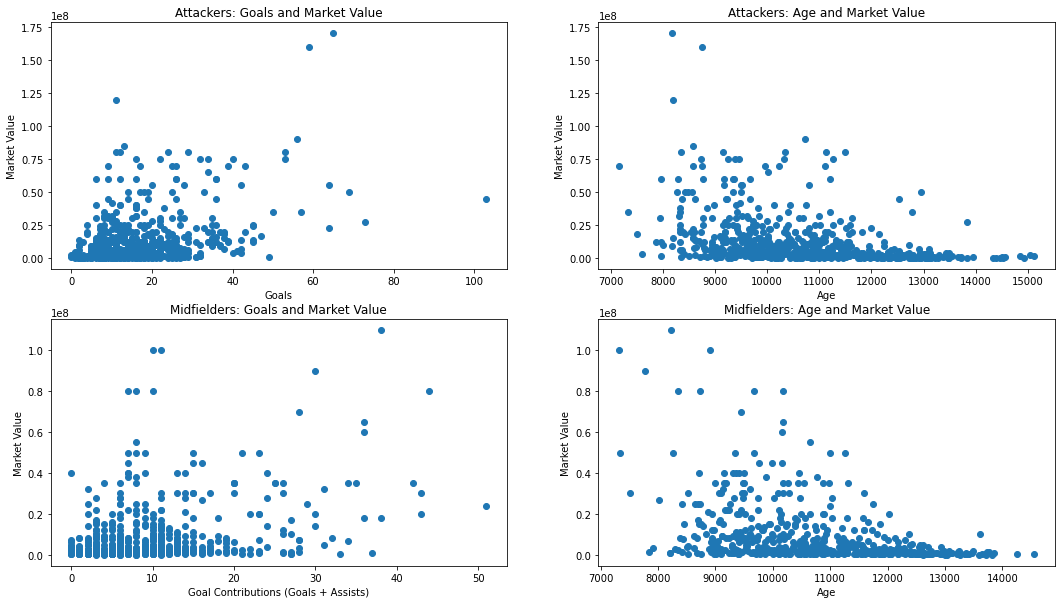

In [13]:
# plot relationship between goals/goal contributions/age and market value of attackers and midfielders

fig, axs = plt.subplots(2, 2, figsize=(18,10))

axs[0, 0].scatter(attackers["goals"], attackers["market_value_in_gbp"])
axs[0, 0].set_xlabel("Goals")
axs[0, 0].set_ylabel("Market Value")
axs[0, 0].set_title("Attackers: Goals and Market Value")

axs[0, 1].scatter(attackers["age_days"], attackers["market_value_in_gbp"])
axs[0, 1].set_xlabel("Age")
axs[0, 1].set_ylabel("Market Value")
axs[0, 1].set_title("Attackers: Age and Market Value")

axs[1, 0].scatter(midfielders["goal_contributions"], midfielders["market_value_in_gbp"])
axs[1, 0].set_xlabel("Goal Contributions (Goals + Assists)")
axs[1, 0].set_ylabel("Market Value")
axs[1, 0].set_title("Midfielders: Goals and Market Value")

axs[1, 1].scatter(midfielders["age_days"], midfielders["market_value_in_gbp"])
axs[1, 1].set_xlabel("Age")
axs[1, 1].set_ylabel("Market Value")
axs[1, 1].set_title("Midfielders: Age and Market Value")

plt.show()

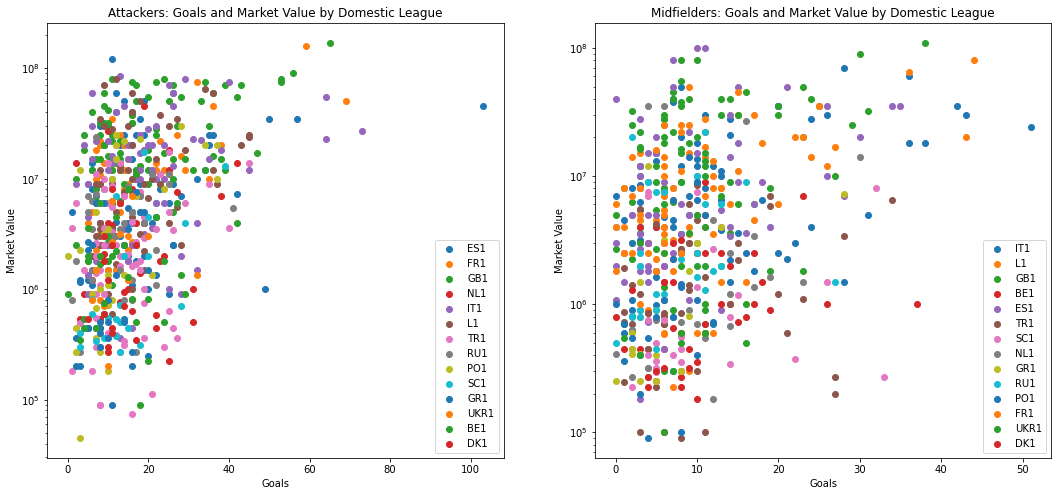

In [14]:
# plot relationship between market value and league
fig, axs = plt.subplots(1, 2, figsize=(18,8))
for league_id in attackers["domestic_competition_id"].unique():
    league = attackers.loc[attackers["domestic_competition_id"] == league_id]
    axs[0].scatter(
        league['goals'], 
        league['market_value_in_gbp'],
        label = league_id
    )
axs[0].legend()
axs[0].set_xlabel("Goals")
axs[0].set_ylabel("Market Value")
axs[0].set_yscale('log')
axs[0].set_title("Attackers: Goals and Market Value by Domestic League")

for league_id in midfielders["domestic_competition_id"].unique():
    league = midfielders.loc[midfielders["domestic_competition_id"] == league_id]
    axs[1].scatter(
        league['goal_contributions'], 
        league['market_value_in_gbp'],
        label = league_id
    )
axs[1].legend()
axs[1].set_xlabel("Goals")
axs[1].set_ylabel("Market Value")
axs[1].set_yscale('log')
axs[1].set_title("Midfielders: Goals and Market Value by Domestic League")

plt.show()

Text(0.5, 1.0, 'Average Market Value by Domestic Competition')

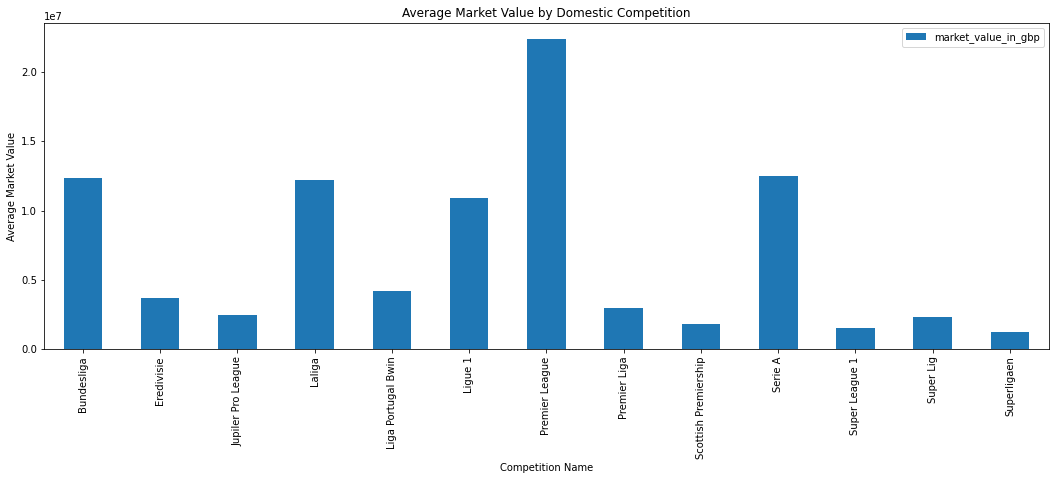

In [15]:
all_positions.groupby("competition_name").mean().plot.bar(y="market_value_in_gbp", figsize=(18, 6))
plt.ylabel("Average Market Value")
plt.xlabel("Competition Name")
plt.title("Average Market Value by Domestic Competition")

Text(0.5, 1.0, 'Average Goal Contributions by Attackers')

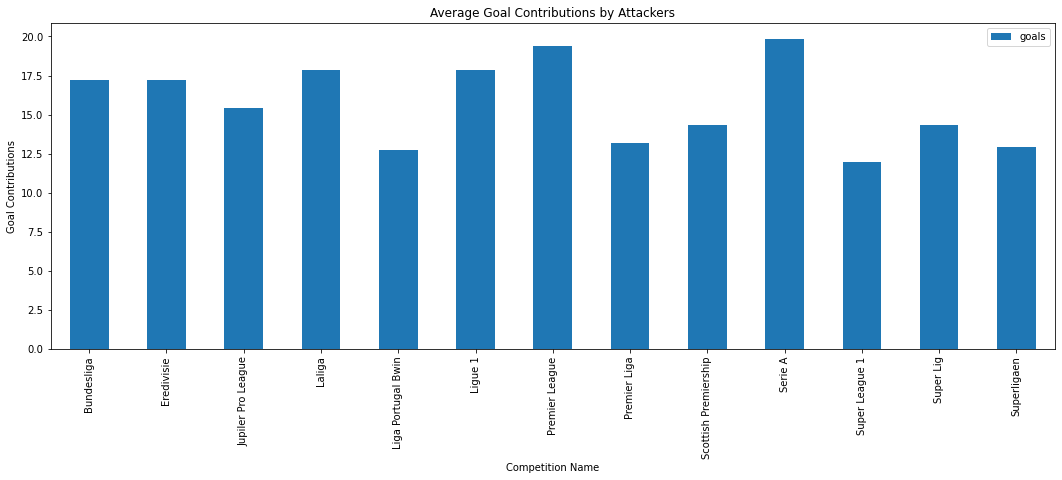

In [16]:
attackers.groupby("competition_name").mean().plot.bar(y="goals", figsize=(18, 6))
plt.ylabel("Goal Contributions")
plt.xlabel("Competition Name")
plt.title("Average Goal Contributions by Attackers")

## Hypothesis
...

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [18]:
# cleaning and splitting test data to predict expected goals for upcoming season based on prior 3 season's data
out_sample_attackers = out_sample_player_info.loc[out_sample_player_info["position"] == "Attack"]
out_sample_attackers = out_sample_attackers.dropna()
data = attackers.merge(out_sample_attackers, left_index=True, right_index=True)
data.columns

Index(['pretty_name_x', 'country_of_citizenship_x', 'foot_x', 'height_in_cm_x',
       'club_id_x', 'club_name_x', 'domestic_competition_id_x', 'position_x',
       'market_value_in_gbp_x', 'highest_market_value_in_gbp_x', 'age_days_x',
       'age_years_x', 'competition_name_x', 'goals_x', 'assists_x',
       'minutes_played_x', 'yellow_cards_x', 'red_cards_x',
       'goal_contributions_x', 'avg_goal_contributions_per_season',
       'league_name_id_x', 'nation_id_x', 'position_id_x', 'pretty_name_y',
       'country_of_citizenship_y', 'foot_y', 'height_in_cm_y', 'club_id_y',
       'club_name_y', 'domestic_competition_id_y', 'position_y',
       'market_value_in_gbp_y', 'highest_market_value_in_gbp_y', 'age_days_y',
       'age_years_y', 'competition_name_y', 'goals_y', 'assists_y',
       'minutes_played_y', 'yellow_cards_y', 'red_cards_y',
       'goal_contributions_y', 'league_name_id_y', 'nation_id_y',
       'position_id_y'],
      dtype='object')

In [19]:
x_var_list = ["goals_x", "assists_x", "height_in_cm_x", "minutes_played_x", "age_days_y", "market_value_in_gbp_y"]
y_var_list = ["goal_contributions_y"]

# split data
X_train, X_test, y_train, y_test = train_test_split(
    data[x_var_list], data[y_var_list], test_size=0.3, random_state=0
)

In [20]:
## Random Forest Regressor
print("***Random Forest Regressor***\n")
rf_models = {}

print("Using Variables to Predict Expected Goal Contributions of Attackers in the Upcoming Season\n")

print("""Input Variables: 
goals, assists, height, and minutes played from last two seasons
current age and market value
""" )

# testing max depth hyperparameter across 10 fold cross validation
print("Training (Cross Validation): Testing Max Depth Hyperparameter")
for max_depth in range(3, 10):
    clf = RandomForestRegressor(max_depth=max_depth, random_state=0)
    cv_rf_results = cross_validate(clf, X_train, y_train, cv=10)
    test_score = cv_rf_results["test_score"]
    rf_models[np.mean(test_score)] = max_depth
keylist = list(rf_models.keys())
keylist.sort(reverse=True)
print(rf_models)

# printing results from model with the best hyperparameters
format_string = " * The best model is with a max depth of {} and has an average r^2 across cross validation of {}"
print(format_string.format(rf_models[keylist[0]], keylist[0]))

# testing model with test data
print("\nTesting")
clf = RandomForestRegressor(max_depth=rf_models[keylist[0]], random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
format_string = " * The best model is with a max depth of {} and has a r^2 on the test data of {}"
print(format_string.format(rf_models[keylist[0]], r2_score(y_test.iloc[:, 0], y_pred)))
format_string = " * The best model is with a max depth of {} and has a RMSE on the test data of {}"
print(format_string.format(rf_models[keylist[0]], math.sqrt(mean_squared_error(y_test.iloc[:, 0], y_pred))))

***Random Forest Regressor***

Using Variables to Predict Expected Goal Contributions of Attackers in the Upcoming Season

Input Variables: 
goals, assists, height, and minutes played from last two seasons
current age and market value

Training (Cross Validation): Testing Max Depth Hyperparameter
{0.6743626156297096: 3, 0.7042862772847649: 4, 0.7203990916963593: 5, 0.7201590858932378: 6, 0.7239088999950664: 7, 0.7272661512618721: 8, 0.7259648059295571: 9}
 * The best model is with a max depth of 8 and has an average r^2 across cross validation of 0.7272661512618721

Testing
 * The best model is with a max depth of 8 and has a r^2 on the test data of 0.7767602938911851
 * The best model is with a max depth of 8 and has a RMSE on the test data of 4.8927401355401114


In [21]:
## Linear Regression
print("***Linear Regression*** \n")

print("Using Variables to Predict Expected Goal Contributions of Attackers in the Upcoming Season\n")

print("""Input Variables: 
    goals, assists, height, and minutes played from last two seasons
    current age and market value
""" )

# testing number of neighbors hyperparameter with mean false negative rate across 10 fold cross validation
print("Training (Cross Validation)")

clf = LinearRegression()
cv_lr_results = cross_validate(clf, X_train, y_train, cv=10)
test_score = cv_lr_results["test_score"]

# printing results from model with the best hyperparameters
format_string = " * The linear regression has an average r^2 across cross validation of {}"
print(format_string.format(np.mean(test_score)))

# testing model with test data
print("\nTesting")
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
format_string = " * The best model is with a max depth of {} and has a r^2 on the test data of {}"
print(format_string.format(rf_models[keylist[0]], r2_score(y_test.iloc[:, 0], y_pred)))
format_string = " * The best model is with a max depth of {} and has a RMSE on the test data of {}"
print(format_string.format(rf_models[keylist[0]], math.sqrt(mean_squared_error(y_test.iloc[:, 0], y_pred))))

***Linear Regression*** 

Using Variables to Predict Expected Goal Contributions of Attackers in the Upcoming Season

Input Variables: 
    goals, assists, height, and minutes played from last two seasons
    current age and market value

Training (Cross Validation)
 * The linear regression has an average r^2 across cross validation of 0.7871567936724706

Testing
 * The best model is with a max depth of 8 and has a r^2 on the test data of 0.7437438874639075
 * The best model is with a max depth of 8 and has a RMSE on the test data of 5.242078807908538


In [22]:
# saving selected model
final_model = LinearRegression()
final_model = final_model.fit(X_train, y_train)
final_model

LinearRegression()

## Model Selection and Predicting Future
...

In [23]:
# Cummulating data from last two seasons 
start_datetime = datetime.datetime(2020, 7, 30)
end_datetime = datetime.datetime(2022, 6, 1)
final_df = full_player_stats.loc[full_player_stats["date"] > start_datetime]
final_df = final_df.loc[final_df["date"] < end_datetime]

# summing stats for players across their appearences in selected competitions
sum_stats = ["goals", "assists", "minutes_played", "yellow_cards", "red_cards"]
final_df_sum = final_df.groupby("player_id")[sum_stats].sum()
final_df_sum = final_df_sum.sort_values("goals", ascending=False)

# capturing player info data that does not need aggregating
details = ["pretty_name", "country_of_citizenship", "foot", "height_in_cm", "club_id", "club_name", 
           "domestic_competition_id","position", "market_value_in_gbp", "highest_market_value_in_gbp",
           "age_days", "age_years", "competition_name"]
def detail(x):
    return x[0]
final_df_details = final_df.groupby("player_id")[details]
final_df_details = final_df_details.agg(lambda col: np.sort(col.unique()).tolist())
for col in final_df_details.columns:
    final_df_details[col] = final_df_details[col].apply(detail)

# merging data into one dataframe
final_df = final_df_details.merge(final_df_sum, left_index=True, right_index=True)
final_df = final_df.dropna()
final_df = final_df.sort_values("goals", ascending=False)
final_df = final_df.loc[final_df["minutes_played"] > 3000]

# calculate statistics and sort data
final_df["goal_contr_last2_seasons"] = final_df["goals"] + final_df["assists"]
final_df = final_df.sort_values("goal_contr_last2_seasons", ascending=False)
final_df_attackers = final_df.loc[final_df["position"] == "Attack"]
final_df_attackers

,pretty_name,country_of_citizenship,foot,height_in_cm,club_id,club_name,domestic_competition_id,position,market_value_in_gbp,highest_market_value_in_gbp,age_days,age_years,competition_name,goals,assists,minutes_played,yellow_cards,red_cards,goal_contr_last2_seasons
player_id,,,,,,,,,,,,,,,,,,,
38253,Robert Lewandowski,Poland,Right,185,131,Fc Barcelona,ES1,Attack,45000000.0,90000000.0,12534.0,34.0,Laliga,102,20,7755,7,0,122
342229,Kylian Mbappe,France,Right,178,583,Fc Paris Saint Germain,FR1,Attack,160000000.0,200000000.0,8761.0,23.0,Ligue 1,69,36,7289,17,0,105
18922,Karim Benzema,France,Right,185,418,Real Madrid,ES1,Attack,35000000.0,60000000.0,12780.0,34.0,Laliga,75,24,7894,3,0,99
418560,Erling Haaland,Norway,Left,195,281,Manchester City,GB1,Attack,170000000.0,170000000.0,8182.0,22.0,Premier League,70,20,5928,7,0,90
36139,Dusan Tadić,Serbia,Left,181,610,Ajax Amsterdam,NL1,Attack,7000000.0,25000000.0,12443.0,34.0,Eredivisie,38,48,7978,4,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357163,Filipe Soares,Portugal,Right,180,1091,Paok Thessaloniki,GR1,Attack,2500000.0,4000000.0,8610.0,23.0,Super League 1,2,2,3832,13,0,4
320259,Sito,Spain,Left,180,6676,Asteras Tripolis,GR1,Attack,450000.0,500000.0,9523.0,26.0,Super League 1,2,2,3211,5,0,4
127826,Anastasios Karamanos,Greece,Right,186,3999,Pas Lamia 1964,GR1,Attack,200000.0,800000.0,11773.0,32.0,Super League 1,3,1,3051,3,0,4


In [24]:
x_var_list = ["goals", "assists", "height_in_cm", "minutes_played", "age_days", "market_value_in_gbp"]
# making expected goal contribution prediction with final model for players in the current season 2022-2023
y_pred = clf.predict(final_df_attackers[x_var_list])
final_df_attackers["2022_2023_EXGC"] = y_pred
final_df_attackers = final_df_attackers.sort_values("2022_2023_EXGC", ascending=False)
final_df_attackers[["pretty_name", "2022_2023_EXGC", "goal_contr_last2_seasons", "club_name", "competition_name", 
                    "market_value_in_gbp", "age_years"]].head(20)

,pretty_name,2022_2023_EXGC,goal_contr_last2_seasons,club_name,competition_name,market_value_in_gbp,age_years
player_id,,,,,,,
342229,Kylian Mbappe,76.933723,105,Fc Paris Saint Germain,Ligue 1,160000000.0,23.0
418560,Erling Haaland,64.031879,90,Manchester City,Premier League,170000000.0,22.0
58358,Thomas Muller,58.930982,80,Fc Bayern Munchen,Bundesliga,18000000.0,33.0
36139,Dusan Tadić,57.545287,86,Ajax Amsterdam,Eredivisie,7000000.0,34.0
38253,Robert Lewandowski,55.025722,122,Fc Barcelona,Laliga,45000000.0,34.0
132098,Harry Kane,52.667159,78,Tottenham Hotspur,Premier League,90000000.0,29.0
344381,Christopher Nkunku,52.262693,73,Rasenballsport Leipzig,Bundesliga,80000000.0,25.0
28003,Lionel Messi,51.302845,80,Fc Paris Saint Germain,Ligue 1,50000000.0,35.0
371998,Vinicius Junior,50.281617,55,Real Madrid,Laliga,120000000.0,22.0


## Discussion of Results
...